In [1]:
import sys
import os
import numpy as np
import copy
from random import shuffle
import math
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

root_ims_dir='/scr/r6/tgebru/inverting_conv/caffe_invert_alexnet/data/pascal/VOCdevkit/VOC2012/JPEGImages'
transformed_ims_dir='/scr/r6/tgebru/inverting_conv/caffe_invert_alexnet/data/pascal/VOCdevkit/VOC2012/transformedImages'

In [48]:
#Make image/transformed image pairs for each type of transformation
transformations=['_0.219_0.530_0.527_0.985','_0.047_0.671_0.092_1.898',
                 '_0.679_0.008_0.654_2.269','_0.679_0.383_0.416_2.973',
                 '_0.935_0.067_0.701_1.096','_0.384_0.417_0.910_0.741',
                 '_0.519_0.687_0.762_2.948','_0.831_0.589_0.262_2.168',
                 '_0.035_0.930_0.047_2.260','_0.053_0.846_0.736_1.955']

transformation=transformations[1]
suffix='%s.jpg'%transformation
source_ims=[os.path.join(root_ims_dir,f) 
            for f in os.listdir(root_ims_dir) if f.endswith('jpg')]
target_ims=[os.path.join(transformed_ims_dir,'%s%s'%(f[0:-4],suffix)) 
            for f in os.listdir(root_ims_dir) if f.endswith('jpg')]

print len(source_ims)
print len(target_ims)

17125
17125


In [49]:
TRAIN_PERCENTAGE=0.8
VAL_PERCENTAGE=0.1
TEST_PERCENTAGE=0.1

train_pairs=[]
val_pairs=[]
test_pairs=[]

num_pairs=0
train=False
val=False
test=False
cur_keys=0

num_keys=len(source_ims)

for (sim,tim) in zip(source_ims,target_ims):
    cur_keys += 1
    if cur_keys<TRAIN_PERCENTAGE*num_keys:
        train=True
    elif (cur_keys-TRAIN_PERCENTAGE*num_keys)/num_keys < VAL_PERCENTAGE:
        val=True
        train=False
        test=False
    else:
        test=True
        train=False
        val=False
        
    if train is True:
        train_pairs.append((sim,tim))
    elif val is True:
        val_pairs.append((sim,tim))
    else:
        test_pairs.append((sim,tim))
    num_pairs += 1
print num_keys,num_pairs,len(train_pairs),len(val_pairs),len(test_pairs)

17125 17125 13699 1713 1713


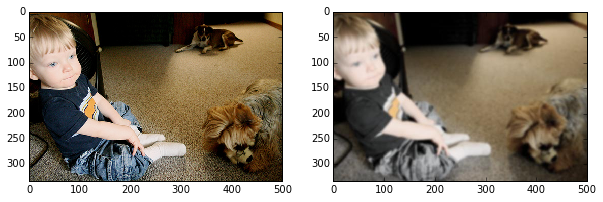

In [59]:
plt.subplot(1,2,1)
plt.imshow(plt.imread(train_pairs[4000][0]))
plt.subplot(1,2,2)
plt.imshow(plt.imread(train_pairs[4000][1]))


In [60]:
shuffle(train_pairs)
shuffle(val_pairs)
shuffle(test_pairs)

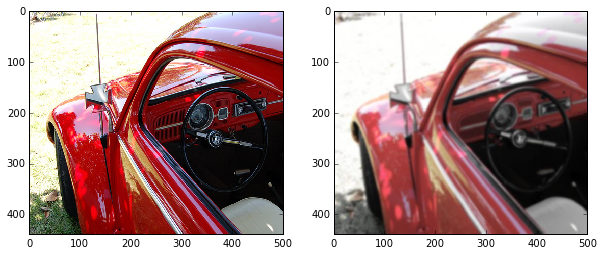

In [63]:
plt.subplot(1,2,1)
plt.imshow(plt.imread(val_pairs[1000][0]))
plt.subplot(1,2,2)
plt.imshow(plt.imread(val_pairs[1000][1]))

In [70]:
output_data_root='/scr/r6/tgebru/inverting_conv/caffe_invert_alexnet/data/pascal'

train_source_file=os.path.join(output_data_root,
                               '%s_source_train.txt'%transformation)
train_target_file=os.path.join(output_data_root,
                               '%s_target_train.txt'%transformation)

val_source_file=os.path.join(output_data_root,
                             '%s_source_val.txt'%transformation)
val_target_file=os.path.join(output_data_root,
                             '%s_target_val.txt'%transformation)

test_source_file=os.path.join(output_data_root,
                             '%s_source_test.txt'%transformation)
test_target_file=os.path.join(output_data_root,
                             '%s_target_test.txt'%transformation)

fs=open(train_source_file,'w')
ft=open(train_target_file,'w')

fvs=open(val_source_file,'w')
fvt=open(val_target_file,'w')

fts=open(test_source_file,'w')
ftt=open(test_target_file,'w')

for p in train_pairs:
    #0 at the end because cafafe model expects labels
    fs.write('%s 0\n'%p[0][1:]) #get rid of leading "/" for making lmdb
    ft.write('%s 0\n'%p[1][1:])
fs.close()
ft.close()

for p in val_pairs:
    fvs.write('%s 0\n'%p[0][1:])
    fvt.write('%s 0\n'%p[1][1:])
fvs.close()
fvt.close()

for p in test_pairs:
    fts.write('%s 0\n'%p[0][1:])
    ftt.write('%s 0\n'%p[1][1:]) 
fts.close()
ftt.close()

scr/r6/tgebru/inverting_conv/caffe_invert_alexnet/data/pascal/VOCdevkit/VOC2012/JPEGImages/2008_004756.jpg
